In [2]:
# pip install pycaret

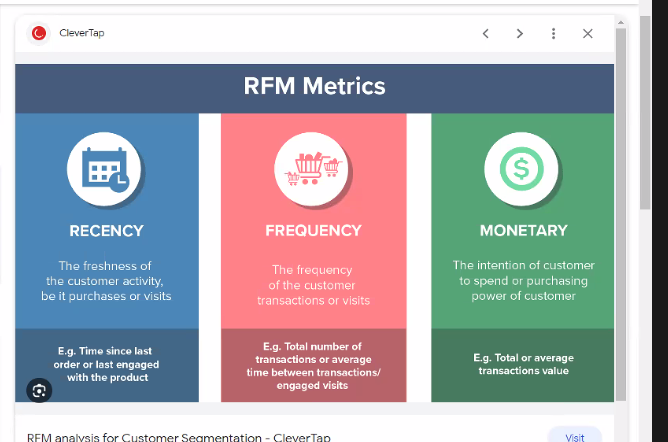

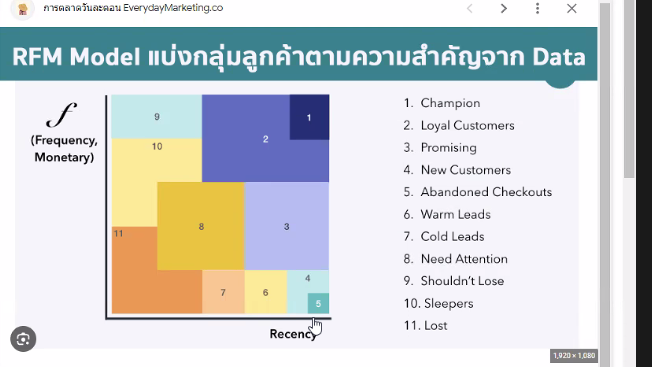

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *

In [4]:
df_Transaction = pd.read_csv("data/Sales_Mini_2013v2.csv")
df_Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60359 entries, 0 to 60358
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          60359 non-null  int64 
 1   DateKey        60359 non-null  object
 2   channelKey     60359 non-null  int64 
 3   StoreKey       60359 non-null  int64 
 4   ProductKey     60359 non-null  int64 
 5   SalesQuantity  60359 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 2.8+ MB


In [5]:
df_Transaction

,Index,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity
0,167454,01-Jan-13,1,119,839,9
1,167455,01-Jan-13,1,270,1311,26
2,167456,01-Jan-13,2,199,704,18
3,167457,01-Jan-13,1,33,652,9
4,167458,01-Jan-13,4,310,1163,13
...,...,...,...,...,...,...
60354,227808,31-Dec-13,4,308,318,6
60355,227809,31-Dec-13,2,306,1571,8
60356,227810,31-Dec-13,1,300,176,13
60357,227811,31-Dec-13,1,182,545,13


In [6]:
# Specify the sheet name you want to open
sheet_name = "Product"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Product = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Product.head(3)

,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,UnitCost,UnitPrice,ProductKey,ProductSubcategoryKey
0,Contoso Wireless Laser Mouse E50 Grey,Advanced 2.4 GHz cordless technology makes fre...,"Contoso, Ltd",Contoso,Economy,10.69,20.96,873,22
1,Contoso Optical Wheel OEM PS/2 Mouse E60 Grey,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Economy,6.63,13.00,879,22
2,Contoso Optical Wheel OEM PS/2 Mouse E60 Black,"PS/2 mouse, 6 feet mouse cable","Contoso, Ltd",Contoso,Economy,6.63,13.00,880,22


In [7]:
# Specify the sheet name you want to open
sheet_name = "ProductSubcategory"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_ProductSubcategory = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_ProductSubcategory.head(3)

,ProductSubcategoryKey,ProductSubcategory,ProductCategoryKey
0,42,Refrigerators,8
1,43,Microwaves,8
2,44,Water Heaters,8


In [8]:
# Specify the sheet name you want to open
sheet_name = "ProductCategory"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_ProductCategory = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_ProductCategory.head(3)

,ProductCategoryKey,ProductCategory
0,1,Audio
1,2,TV and Video
2,3,Computers


In [9]:
# Specify the sheet name you want to open
sheet_name = "Channel"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Channel = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Channel.head(3)

,Channel,ChannelName
0,1,Store
1,2,Online
2,3,Catalog


In [10]:
# Specify the sheet name you want to open
sheet_name = "Stores"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Stores = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Stores.head(3)

,StoreKey,GeographyKey,StoreType,StoreName,Status,CloseReason,EmployeeCount,SellingAreaSize
0,1,693,Store,Contoso Seattle No.1 Store,On,NaN,17.0,462
1,2,693,Store,Contoso Seattle No.2 Store,On,NaN,25.0,700
2,3,856,Store,Contoso Kennewick Store,On,NaN,26.0,680


In [11]:
# Specify the sheet name you want to open
sheet_name = "Geography"  # Replace "Sheet2" with the actual sheet name you want to open

# Read the Excel file with the specified sheet
df_Geography = pd.read_excel('data/RefTable.xlsx', sheet_name=sheet_name)
df_Geography.head(3)

,GeographyKey,GeographyType,ContinentName,RegionCountryName
0,424,City,North America,United States
1,430,City,North America,United States
2,431,City,North America,United States


In [12]:
# Merge the 'df_Transaction' and 'df_Product' DataFrames based on the 'ProductKey' column
joined_df = pd.merge(df_Transaction, df_Product, on="ProductKey")

# Output the resulting merged DataFrame
joined_df

,Index,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,UnitCost,UnitPrice,ProductSubcategoryKey
0,167454,01-Jan-13,1,119,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
1,168313,07-Jan-13,1,48,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
2,169140,12-Jan-13,2,306,839,8,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
3,169148,12-Jan-13,1,276,839,13,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
4,171268,25-Jan-13,4,308,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.90,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60354,212740,03-Oct-13,1,4,875,10,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22
60355,217585,01-Nov-13,1,196,875,6,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22
60356,218898,09-Nov-13,1,97,875,6,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22
60357,219597,13-Nov-13,1,258,875,6,Contoso Wireless Notebook Optical Mouse X205 W...,"Wireless notebook mouse, long battery life, co...","Contoso, Ltd",Contoso,Deluxe,43.06,129.95,22


In [13]:
# Calculate the revenue by multiplying the 'SalesQuantity' and 'UnitPrice' columns
joined_df["Revenue"] = joined_df["SalesQuantity"] * joined_df["UnitPrice"]

# Display the first few rows of the updated DataFrame
joined_df.head(3)

,Index,DateKey,channelKey,StoreKey,ProductKey,SalesQuantity,ProductName,ProductDescription,Manufacturer,BrandName,ClassName,UnitCost,UnitPrice,ProductSubcategoryKey,Revenue
0,167454,01-Jan-13,1,119,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,233.1
1,168313,07-Jan-13,1,48,839,9,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,233.1
2,169140,12-Jan-13,2,306,839,8,Contoso USB Wave Multi-Media Keyboard M901 Gold,USB wave multimedia keyboard,"Contoso, Ltd",Contoso,Regular,11.91,25.9,22,207.2


In [14]:
joined_df['DateKey'] = pd.to_datetime(joined_df['DateKey'])

# Calculate the maximum date from the joined_df DataFrame
max_date = joined_df['DateKey'].max()

# Calculate the Recency by subtracting the maximum date for each StoreKey from the max_date
recency_df = joined_df.groupby('StoreKey')['DateKey'].max().reset_index()
recency_df['Recency'] = (max_date - recency_df['DateKey']).dt.days

# Drop the unnecessary 'DateKey' column
recency_df.drop('DateKey', axis=1, inplace=True)

# Calculate the Frequency and Monetary metrics as before
frequency_df = joined_df.groupby('StoreKey')['Index'].nunique().reset_index()
frequency_df.columns = ['StoreKey', 'Frequency']

monetary_df = joined_df.groupby('StoreKey')['Revenue'].sum().reset_index()
monetary_df.columns = ['StoreKey', 'Monetary']

# Merge the recency, frequency, and monetary DataFrames
rfm_df = pd.merge(recency_df, frequency_df, on='StoreKey')
rfm_df = pd.merge(rfm_df, monetary_df, on='StoreKey')

# Print the RFM DataFrame
rfm_df.head()

,StoreKey,Recency,Frequency,Monetary
0,1,0,120,470281.41
1,2,4,102,411718.49
2,3,2,106,405689.80
3,4,1,110,379965.39
4,5,3,104,418580.95


In [15]:
data = rfm_df

s = setup(data, 
          ignore_features = ['StoreKey'],
          session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(306, 4)"
2,Transformed data shape,"(306, 3)"
3,Ignore features,1
4,Numeric features,3
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [16]:
kmeans = create_model('kmeans', num_clusters=3)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9798,12148.6815,0.2098,0,0,0


In [17]:
print(kmeans)

KMeans(n_clusters=3, random_state=123)


In [18]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

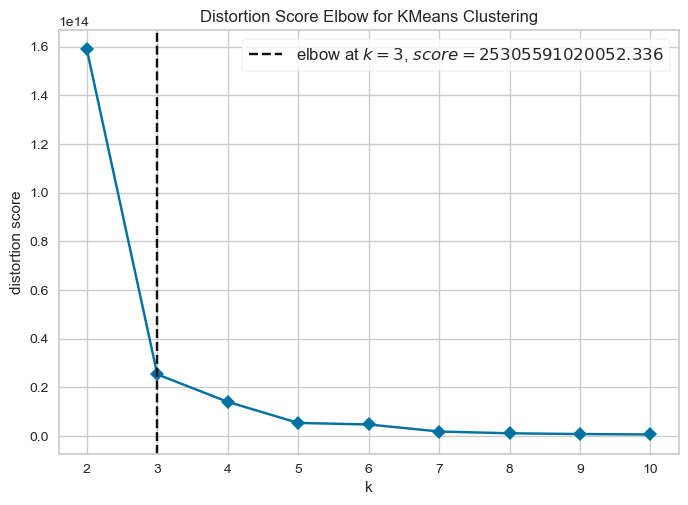

In [19]:
plot_model(kmeans, plot = 'elbow')

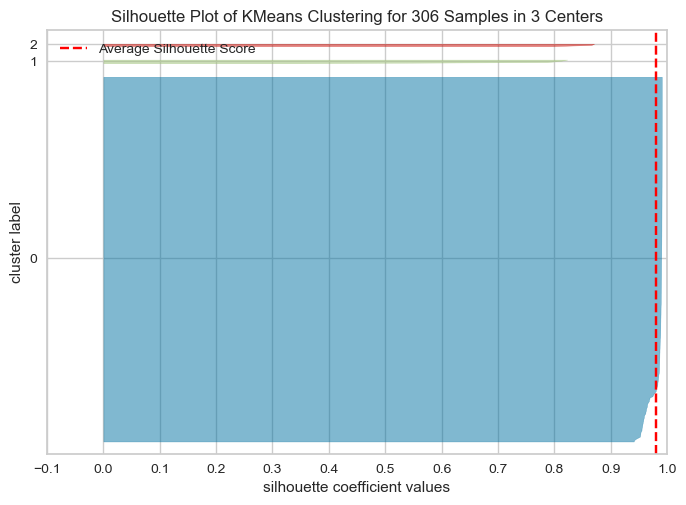

In [20]:
plot_model(kmeans, plot = 'silhouette')

In [21]:
result = assign_model(kmeans)
result.head()

,Recency,Frequency,Monetary,Cluster
0,0,120,470281.40625,Cluster 0
1,4,102,411718.50000,Cluster 0
2,2,106,405689.81250,Cluster 0
3,1,110,379965.37500,Cluster 0
4,3,104,418580.93750,Cluster 0


In [22]:
result = result.merge(rfm_df[["StoreKey"]], left_index=True, right_index=True)
result.head()

,Recency,Frequency,Monetary,Cluster,StoreKey
0,0,120,470281.40625,Cluster 0,1
1,4,102,411718.50000,Cluster 0,2
2,2,106,405689.81250,Cluster 0,3
3,1,110,379965.37500,Cluster 0,4
4,3,104,418580.93750,Cluster 0,5


In [23]:
cluster_counts = result['Cluster'].value_counts()
cluster_counts

Cluster
Cluster 0    299
Cluster 1      4
Cluster 2      3
Name: count, dtype: int64

In [24]:
summary = result.groupby("Cluster").mean()[["Recency", "Frequency", "Monetary"]]
summary

,Recency,Frequency,Monetary
Cluster,,,
Cluster 0,2.408027,121.882943,467203.75
Cluster 1,0.000000,3976.500000,20897780.00
Cluster 2,0.000000,2670.000000,12071584.00


In [25]:
alternative_names = {
    "Cluster 0": "Bronze",
    "Cluster 1": "Silver", 
    "Cluster 2": "Gold"
}

In [26]:
result["Cluster"] = result["Cluster"].replace(alternative_names)
result

,Recency,Frequency,Monetary,Cluster,StoreKey
0,0,120,4.702814e+05,Bronze,1
1,4,102,4.117185e+05,Bronze,2
2,2,106,4.056898e+05,Bronze,3
3,1,110,3.799654e+05,Bronze,4
4,3,104,4.185809e+05,Bronze,5
...,...,...,...,...,...
301,0,3819,1.798831e+07,Silver,306
302,0,4112,2.181152e+07,Silver,307
303,0,2739,1.279612e+07,Gold,308
304,0,2496,1.068494e+07,Gold,309


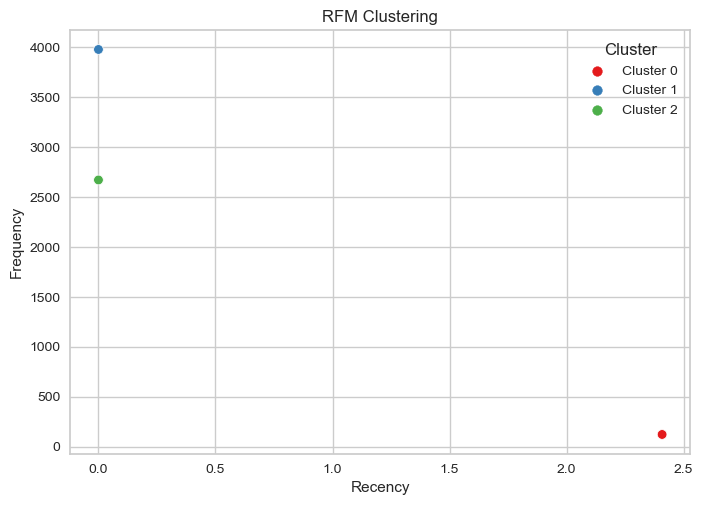

In [27]:
# Create a scatter plot with 'TransactionCount' on the x-axis, 'TotalRevenue' on the y-axis, and hue='Cluster' for the legend
sns.scatterplot(x="Recency", y="Frequency", hue='Cluster', data=summary, palette="Set1")

# Set labels and title
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.title("RFM Clustering")

# Show the plot
plt.show()

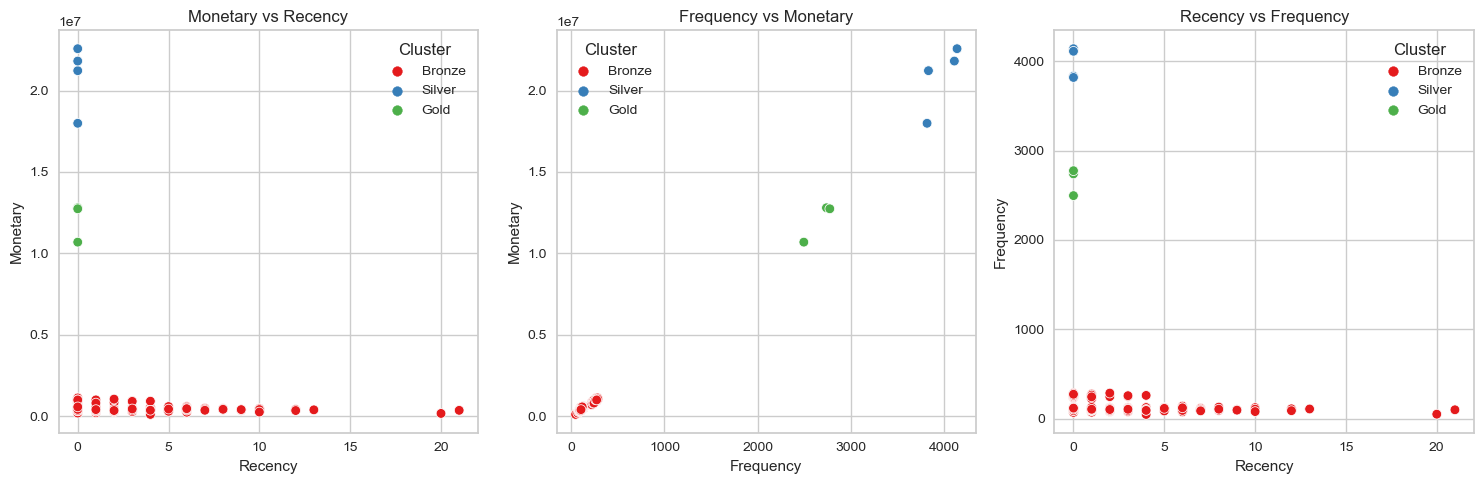

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(data=result, x="Recency", y="Monetary", hue="Cluster", palette="Set1", ax=axes[0])
axes[0].set_title("Monetary vs Recency")
axes[0].set_xlabel("Recency")
axes[0].set_ylabel("Monetary")

sns.scatterplot(data=result, x="Frequency", y="Monetary", hue="Cluster", palette="Set1", ax=axes[1])
axes[1].set_title("Frequency vs Monetary")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Monetary")

sns.scatterplot(data=result, x="Recency", y="Frequency", hue="Cluster", palette="Set1", ax=axes[2])
axes[2].set_title("Recency vs Frequency")
axes[2].set_xlabel("Recency")
axes[2].set_ylabel("Frequency")

plt.tight_layout()

plt.show()

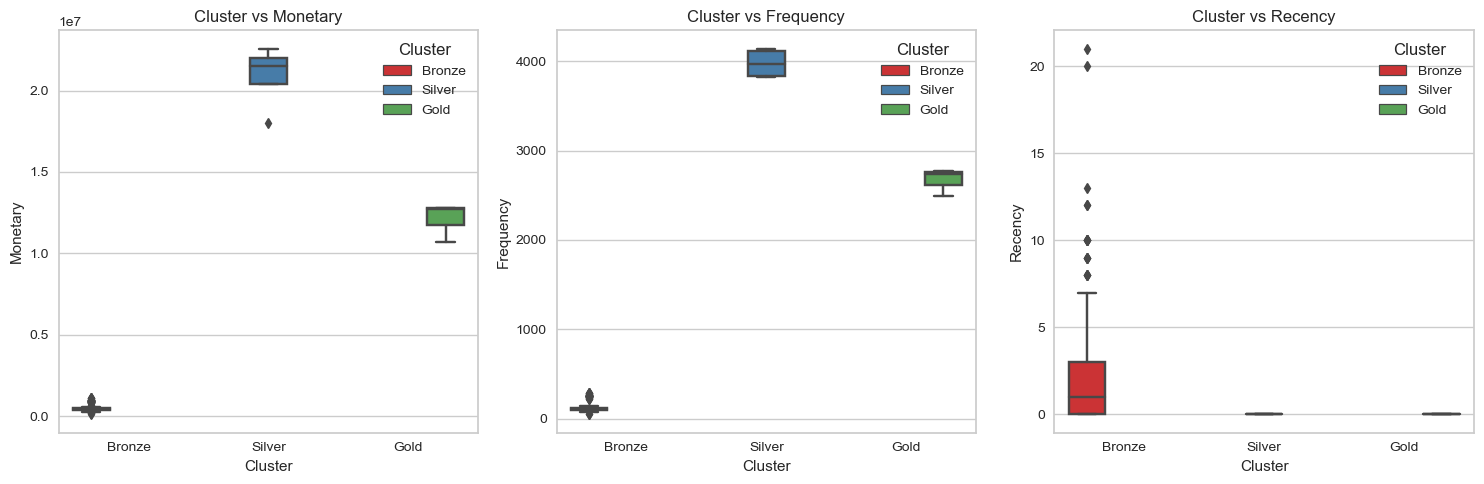

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Box plot : Cluster vs. Monetary
sns.boxplot(data=result, x="Cluster", y="Monetary", hue="Cluster", palette="Set1", ax=axes[0])
axes[0].set_title("Cluster vs Monetary")
axes[0].set_xlabel("Cluster")
axes[0].set_ylabel("Monetary")

sns.boxplot(data=result, x="Cluster", y="Frequency", hue="Cluster", palette="Set1", ax=axes[1])
axes[1].set_title("Cluster vs Frequency")
axes[1].set_xlabel("Cluster")
axes[1].set_ylabel("Frequency")

sns.boxplot(data=result, x="Cluster", y="Recency", hue="Cluster", palette="Set1", ax=axes[2])
axes[2].set_title("Cluster vs Recency")
axes[2].set_xlabel("Cluster")
axes[2].set_ylabel("Recency")

plt.tight_layout()

plt.show()